In [227]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [228]:
import os
os.listdir("../input/flower-dataset2/")

['burflower', 'lavender', 'daisy', 'sunflower', 'tulip', 'rose']

In [229]:
daisy = "../input/flower-dataset2/daisy"
lavender = "../input/flower-dataset2/lavender"
rose = "../input/flower-dataset2/rose"
sunflower = "../input/flower-dataset2/sunflower"
tulip = "../input/flower-dataset2/tulip"

In [230]:
species = ['daisy', 'lavender', 'rose', 'sunflower', 'tulip']
print(species)

['daisy', 'lavender', 'rose', 'sunflower', 'tulip']


In [231]:
print(type(lavender[0]))

<class 'str'>


In [232]:
x = []
y = []
img_size=(224,224)
import matplotlib.pyplot as plt
import cv2
def make_whole_dataset(directory,flower):
    try:
        for img in os.listdir(directory):
            path = os.path.join(directory,img)
            img_array = cv2.imread(path,cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array,img_size)
            x.append(np.array(img_array))
            y.append(str(flower))
    except:
        None

    print("Flower {} has been added to the Dataset Successfully".format(flower))
        

In [233]:
make_whole_dataset(daisy,"Daisy")
make_whole_dataset(lavender,"Lavender")
make_whole_dataset(rose,"Rose")
make_whole_dataset(sunflower,"Sunflower")
make_whole_dataset(tulip,"Tulip")


Flower Daisy has been added to the Dataset Successfully
Flower Lavender has been added to the Dataset Successfully
Flower Rose has been added to the Dataset Successfully
Flower Sunflower has been added to the Dataset Successfully
Flower Tulip has been added to the Dataset Successfully


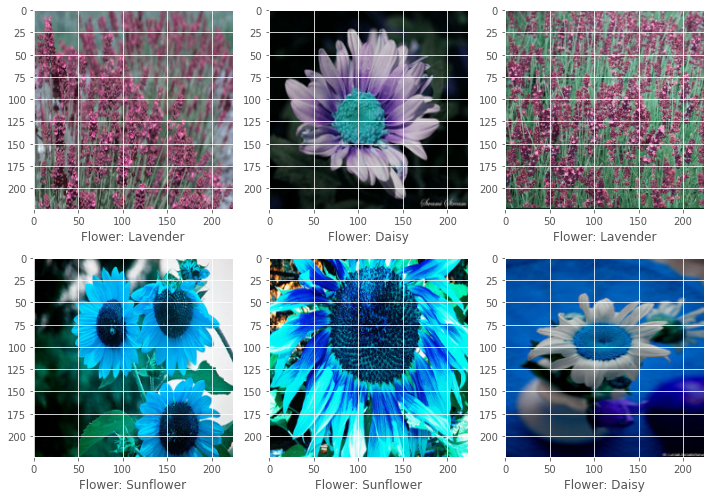

In [234]:
import random
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,10))
fig.set_size_inches(10,10)
for i in range(6):
    plt.subplot(3,3,i+1)
    sample = random.randint(0,len(y))
    plt.imshow(x[sample])
    plt.xlabel("Flower: {}".format(y[sample]))
    
plt.tight_layout()

In [235]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y,5)

In [236]:
from sklearn.model_selection import train_test_split
x = np.array(x)
x = x/255.0
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [237]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(weights = 'imagenet',include_top=True)

In [238]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [239]:
for layers in vgg.layers[:19]:
    layers.trainable = False

In [240]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
x = vgg.layers[-2].output
predictions = Dense(5,activation='softmax')(x)
model = Model(inputs=vgg.input, outputs = predictions)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [241]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [242]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5",monitor = 'val_accuracy',verbose=1,save_best_only = True,save_weights_only = False,
                             mode='auto',period=1)
earlystop = EarlyStopping(monitor = 'val_acc',patience = 20,min_delta = 0,verbose = 1,mode = 'auto')

In [243]:
history = model.fit(x_train,y_train,epochs = 30,validation_data=(x_test,y_test),callbacks=[checkpoint,earlystop])

Epoch 1/30
19/19 [==============================] - 3s 116ms/step - loss: 11.0042 - accuracy: 0.3154 - val_loss: 1.0535 - val_accuracy: 0.5570

Epoch 00001: val_accuracy improved from -inf to 0.55705, saving model to vgg16_1.h5
Epoch 2/30
19/19 [==============================] - 2s 94ms/step - loss: 0.5323 - accuracy: 0.7836 - val_loss: 0.3790 - val_accuracy: 0.8792

Epoch 00002: val_accuracy improved from 0.55705 to 0.87919, saving model to vgg16_1.h5
Epoch 3/30
19/19 [==============================] - 2s 93ms/step - loss: 0.1329 - accuracy: 0.9547 - val_loss: 0.1943 - val_accuracy: 0.9396

Epoch 00003: val_accuracy improved from 0.87919 to 0.93960, saving model to vgg16_1.h5
Epoch 4/30
19/19 [==============================] - 2s 93ms/step - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.2038 - val_accuracy: 0.9396

Epoch 00004: val_accuracy did not improve from 0.93960
Epoch 5/30
19/19 [==============================] - 2s 93ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1757

In [244]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

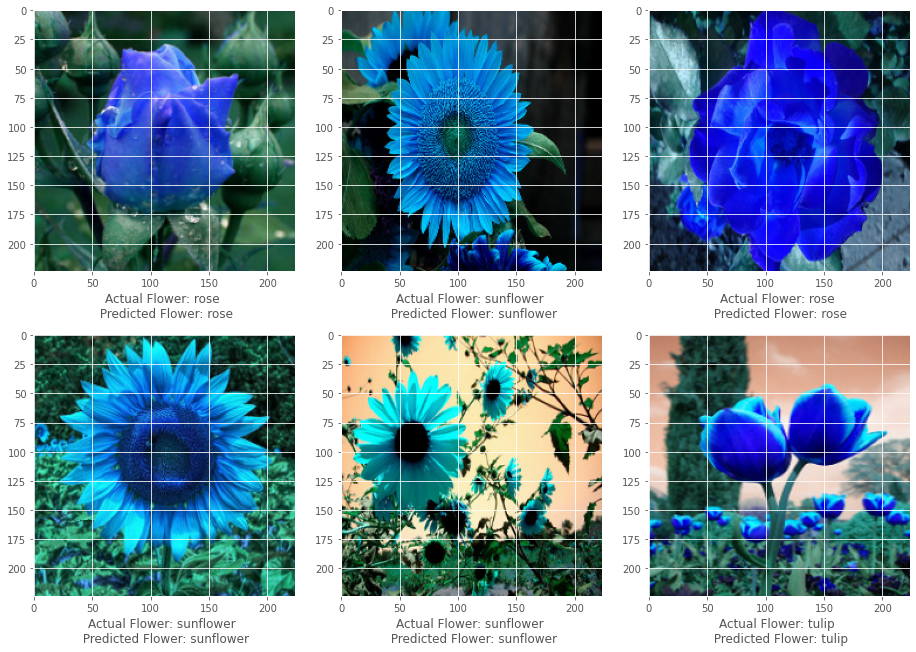

In [245]:
import random
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,10))
fig.set_size_inches(13,13)
for i in range(6):
    plt.subplot(3,3,i+1)
    sample = random.randint(0,len(y_test)-1)
    plt.imshow(x_test[sample])
#     plt.xlabel("Actual Flower: {} \n Predicted Flower: {}".format(np.argmax(y_test[sample]),y_pred[sample]))
    var = np.argmax(y_test[sample])
    plt.xlabel("Actual Flower: {} \n Predicted Flower: {}".format(species[var],species[y_pred[sample]]))
    
plt.tight_layout()

In [246]:
model.save('flowers_model2.h5') 

In [247]:
from tensorflow.keras.models import load_model

model2 = load_model('flowers_model2.h5')

In [248]:
from PIL import Image
img1 = Image.open('../input/predictflower2/test_daisy.jpg')
imResize = img1.resize((224,224), Image.ANTIALIAS)
imResize.save('predict_daisy.jpg', 'JPEG', quality=90)

(1, 224, 224, 3)

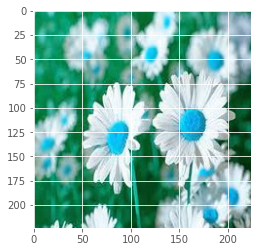

In [249]:
predictimg=cv2.imread("predict_daisy.jpg",1)
predictimg=np.array(predictimg)
plt.imshow(predictimg)
predictimg=predictimg/255.0

predictimg = np.expand_dims(predictimg, axis=0)
predictimg.shape

In [250]:
predition=model.predict(predictimg)

predition=np.squeeze(predition)
print(predition)
predIndex=np.argmax(predition)

[9.8513526e-01 2.4410156e-03 4.6947658e-05 1.2373021e-02 3.7039138e-06]


In [251]:
print("The Species of given image is",species[predIndex])

The Species of given image is daisy


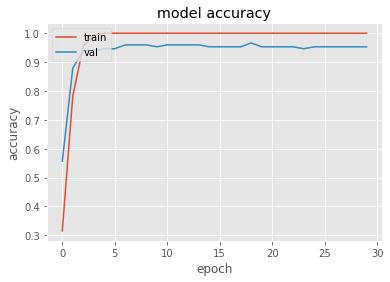

In [252]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
